<img src="images/microsoft_tenne.png" alt="tenne image" style="width: 400px;"/>

# A Vision for Microsoft Tenné 
***


**Author:** [Rebecca Frost-Brewer](https://www.linkedin.com/in/rebecca-frost-brewer/)

<img src="images/rfb-headshot.png" alt="headshot" style="width: 100px;" align="left"/>

## Overview

This project analyzes current trends in the movie industry to establish a vision for Microsoft's new movie studio, Microsoft Tenné. Descriptive analysis of data from IMDb, The Movie Database, and Box Office Mojo provides insight into the genre of films that have the highest audience ratings and highest gross earnings. Microsoft Tenné can use this analysis to guide their decision-making process in determining what genre of movie to produce.


## Business Problem

Microsoft sees many big companies creating original video content and want to establish their own movie studio to compete within the digital content market. 

To assist Microsoft in solving this problem, I will consider:

* What genres are the most successful, both in terms of audience rating and gross earnings?
* Of the top grossing films, which genres were most successful (had the highest gross earnings)?
* Is there a correlation between audience rating and gross earnings?


***

## Data Understanding

The data for this analysis have come from:

* The Movie Database (movie title, audience rating)
* IMDb (movie title, release year, genres, and audience rating)
* Box Office Mojo (movie title, gross earnings)

The target variables for this analysis are release year, gross earnings, genres, and audience ratings. These variables are all important and necessary to address Microsoft's business problem. Audience ratings, gross earnings, and release year are numeric variables (though gross earnings is continuous) and genres are categorical. 

The data used in this analysis has been compiled from three different platforms and includes all movies these platforms monitor. Since we are providing Microsoft with recommendations for success, we can safely assume these platforms accurately account for the movies of interest.

As we consider this data however, we should note that the data includes movies from 2010 to 2018. This is noteworthy because the data does not include the most recent three years of movie-making; since movie-watching trends can shift dramatically year to year, the conclusions and recommendations presented here may change based on more recent movies.


***

## Data Preparation

To prepare the data for analysis, I needed to combine four individual csv files into one master file. Luckily, since we're dealing with movies and movie titles, I was able to use the titles as the key for joining the dataframes.

For the IMDb files, I did drop the 'original_title', 'runtime_minutes', and 'numvotes' columns as they are not relevant or pertinent to the business questions I am addressing.

For each of the files, I also dropped all rows that had any NaN values. I made this decision because I determined that if a movie was missing any data from these sources, that movie would not be mainstream popular nor would have gross earnings of significance. For the purposes of this analysis, I decided to focus on any movies with an average audience rating 7.0 or greater and with gross earnings greater than $3mil. Movies with NaN values would not meet those conditions, therefore could be dropped without worrying about significantly altering the analysis.

Futher, both IMDb and The Movie Database had a measure of average rating - I created a new variable that took the average of these averages, for one "master" average rating that was used in analysis. That way, the ratings from both sources were incorporated.

Lastly, I modified the gross earnings number by dividing the value by 1mil. Since the gross earnings for the movies I was analyzing are obviously more than just 1mil, I wanted the value to be more readable.

To finalize the data preparation, I created a smaller dataframe of just those movies with an average rating of 7.0 or greater and gross earnings of at least $3mil. For movies with multiple genres, I split each genre individually.

***


In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Import the data from The Movie Database
tmdb_movies = pd.read_csv("data/zippedData/tmdb.movies.csv.gz", index_col = 0)
# here we specify the index column otherwise we'd have a duplicated index column

# Import the data from IMDb
imdb_title_basics = pd.read_csv("data/zippedData/imdb.title.basics.csv.gz")
imdb_title_ratings = pd.read_csv("data/zippedData/imdb.title.ratings.csv.gz")

# Import the Box Office Mojo data on the gross earnings of movies
movie_gross = pd.read_csv("data/zippedData/bom.movie_gross.csv.gz")

# Join the two IMDb files into one dataframe
imdbreviews = imdb_title_basics.join(imdb_title_ratings.set_index('tconst'),
                                   how = 'inner', on = 'tconst', rsuffix = 'r')

imdbreviews = imdbreviews.drop(columns = ['original_title', 'runtime_minutes', 'numvotes'])
# Based on the documentation from IMDb, the primary title is the more popular title,
# used by the filmmakers on promotional materials whereas the original title is the original title,
# in its original language. I decided to drop the original title since we'll be more familiar with
# the primary title

imdbreviews.rename(columns = {'primary_title':'title'}, inplace = True)
# Change the column name of the movie title to 'title', which will match our additional files

In [4]:
# Dropping NaNs and a quick view of the IMDb Reviews dataframe
imdbreviws = imdbreviews.dropna(inplace = True)
imdbreviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 146134
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73052 non-null  object 
 1   title          73052 non-null  object 
 2   start_year     73052 non-null  int64  
 3   genres         73052 non-null  object 
 4   averagerating  73052 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB


In [5]:
# From The Movie Database dataframe, we only want the movie title and the vote average.
tmdb_movies = tmdb_movies[['title', 'vote_average']]
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         26517 non-null  object 
 1   vote_average  26517 non-null  float64
dtypes: float64(1), object(1)
memory usage: 621.5+ KB


In [6]:
# From Box Office Mojo, we only want to keep the title and domestic gross earnings for the films
movie_gross = movie_gross[['title', 'domestic_gross']]

In [7]:
# Here, we are mutating the gross earnings per million 
movie_gross['gross_mil'] = (movie_gross['domestic_gross'])/1000000

In [8]:
# Keeping only the variables we need and dropping NaNs
movie_gross = movie_gross[['title', 'gross_mil']]
movie_gross.dropna(inplace = True)
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3359 entries, 0 to 3386
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      3359 non-null   object 
 1   gross_mil  3359 non-null   float64
dtypes: float64(1), object(1)
memory usage: 78.7+ KB


In [9]:
# Preview our IMDb data
imdbreviews.head()

,tconst,title,start_year,genres,averagerating
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5


In [10]:
# Preview our The Movie Database data
tmdb_movies.head()

,title,vote_average
0,Harry Potter and the Deathly Hallows: Part 1,7.7
1,How to Train Your Dragon,7.7
2,Iron Man 2,6.8
3,Toy Story,7.9
4,Inception,8.3


In [11]:
# Preview the Box Office Mojo data
movie_gross.head()

,title,gross_mil
0,Toy Story 3,415.0
1,Alice in Wonderland (2010),334.2
2,Harry Potter and the Deathly Hallows Part 1,296.0
3,Inception,292.6
4,Shrek Forever After,238.7


In [12]:
# Combining all three dataframes into one
moviedf = imdbreviews.merge(tmdb_movies, on = 'title').merge(movie_gross, on = 'title')
moviedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3259 entries, 0 to 3258
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         3259 non-null   object 
 1   title          3259 non-null   object 
 2   start_year     3259 non-null   int64  
 3   genres         3259 non-null   object 
 4   averagerating  3259 non-null   float64
 5   vote_average   3259 non-null   float64
 6   gross_mil      3259 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 203.7+ KB


In [17]:
# Previewing our dataframe we have created specifically for our analysis
moviedf.head()

,tconst,title,start_year,genres,averagerating,vote_average,gross_mil
0,tt0315642,Wazir,2016,"Action,Crime,Drama",7.1,6.6,1.100
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,5.6,0.744
2,tt4339118,On the Road,2014,Drama,6.0,5.6,0.744
3,tt5647250,On the Road,2016,Drama,5.7,5.6,0.744
4,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,7.1,58.200


In [16]:
moviedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3259 entries, 0 to 3258
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         3259 non-null   object 
 1   title          3259 non-null   object 
 2   start_year     3259 non-null   int64  
 3   genres         3259 non-null   object 
 4   averagerating  3259 non-null   float64
 5   vote_average   3259 non-null   float64
 6   gross_mil      3259 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 203.7+ KB


In [18]:
# Creating an average audience rating based on ratings scores from IMDb and The Movie Database
moviedf['ratingave'] = (moviedf["averagerating"] + moviedf["vote_average"])/2
moviedf = moviedf.drop(columns = ['averagerating', 'vote_average'])
moviedf.head()

,tconst,title,start_year,genres,gross_mil,ratingave
0,tt0315642,Wazir,2016,"Action,Crime,Drama",1.100,6.85
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",0.744,5.85
2,tt4339118,On the Road,2014,Drama,0.744,5.80
3,tt5647250,On the Road,2016,Drama,0.744,5.65
4,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",58.200,7.20


In [19]:
# Creating a smaller dataframe of movies with at least a rating of 7.0 and grossed earnings of at least 3mil
moviedf_small = moviedf[(moviedf['ratingave'] >= 7) &
                        (moviedf['gross_mil'] >= 3)]
moviedf_small

,tconst,title,start_year,genres,gross_mil,ratingave
4,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",58.2,7.20
9,tt3079380,Spy,2015,"Action,Comedy,Crime",110.8,7.00
15,tt0398286,Tangled,2010,"Adventure,Animation,Comedy",200.8,7.65
31,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",415.0,8.00
32,tt0443272,Lincoln,2012,"Biography,Drama,History",182.2,7.10
...,...,...,...,...,...,...
3249,tt7745068,My Hero Academia: Two Heroes,2018,"Action,Adventure,Animation",5.8,8.05
3250,tt7775622,Free Solo,2018,"Documentary,Sport",17.5,8.10
3251,tt7784604,Hereditary,2018,"Drama,Horror,Mystery",44.1,7.15
3252,tt7905466,They Shall Not Grow Old,2018,"Documentary,History,War",18.0,8.25


In [20]:
# We want to split the genre column for analysis, so that each genre is on its own
moviedf_small = moviedf_small.assign(genres = moviedf_small['genres'].str.split(',')).explode('genres')
moviedf_small.head()

,tconst,title,start_year,genres,gross_mil,ratingave
4,tt0359950,The Secret Life of Walter Mitty,2013,Adventure,58.2,7.2
4,tt0359950,The Secret Life of Walter Mitty,2013,Comedy,58.2,7.2
4,tt0359950,The Secret Life of Walter Mitty,2013,Drama,58.2,7.2
9,tt3079380,Spy,2015,Action,110.8,7.0
9,tt3079380,Spy,2015,Comedy,110.8,7.0


***
## Data Modeling

To start exploring the data, I calculated a count of all the movies from each genre. This exercise showed that of the 492 movies in our dataset, 250 were Dramas, followed by Comedy, with 102 movies. In other words, 50 percent of movies that grossed more than $3mil and rated more than 7.0 were dramas; comedies represented 21 percent of the movies.

With this count of genres, I was able to ascertain the average movie rating for each genre - while dramas make up 50 percent of the dataset, dramas rank 12th in average rating! The 16 musical movies and 33 sci-fi movies were the two genres with the highest aggregate average rating, 7.7 and 7.6, respectively.

Next, I calculated the average gross earnings for each genre - and again, while dramas make up 50 percent of the dataset, dramas rank 17th in average gross earnings! The top three genres with the highest average gross earnings are: Sci-Fi (251 million), Adventure (215 million), and Action (207 million).

Lastly, I created a smaller dataframe grouped by year, genre, and gross earnings only of those films that grossed more than $139.7 million (75th quartile and above) and only included the genres of note: Drama, Comedy, Musical, Sci-Fi, Action, Adventure, and Animation. From this smaller dataframe, I created a visualization faceted by year, to see the toppest grossing genres by year to determine if there are any trends we can use in addressing our business problem.



***

### Count of Movies by Genre

In [44]:
# Select only genres and title
topratings_bygenre = moviedf_small[['genres', 'title']]
topratings_bygenre

,genres,title
4,Adventure,The Secret Life of Walter Mitty
4,Comedy,The Secret Life of Walter Mitty
4,Drama,The Secret Life of Walter Mitty
9,Action,Spy
9,Comedy,Spy
...,...,...
3252,Documentary,They Shall Not Grow Old
3252,History,They Shall Not Grow Old
3252,War,They Shall Not Grow Old
3253,Crime,Shoplifters


In [80]:
# Create a new dataframe with the count of movies per genre
topratings_genre = (pd.DataFrame(moviedf_small.groupby('genres', as_index = False).title.nunique())).sort_values(
    by = 'title', ascending = False)

topratings_genre

,genres,title
7,Drama,250
4,Comedy,102
1,Adventure,90
0,Action,79
3,Biography,77
5,Crime,54
18,Thriller,51
15,Romance,46
6,Documentary,37
2,Animation,35


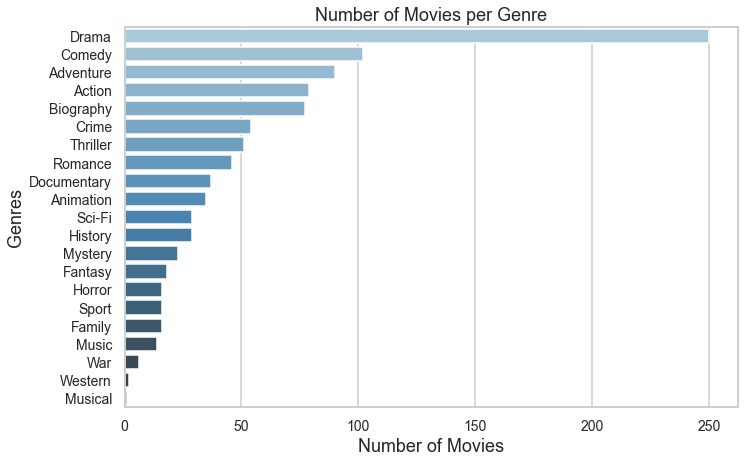

In [76]:
# Plot the number of movies per genre
plt.figure(figsize=(11, 7))
sns.set_style('whitegrid')
sns.set_context("talk")
ax = sns.barplot(x = "title", y = "genres", data = topratings_genre,
                 order = topratings_genre.sort_values('title', ascending = False).genres,
                 palette = 'Blues_d');
ax.set(xlabel = 'Number of Movies',
       ylabel = 'Genres', title = 'Number of Movies per Genre')
plt.tick_params(labelsize = 14)
plt.show()

### Movie Genres Ranked by Average Rating

In [88]:
# Create a new dataframe with the average rating of each genre
genre_ratings = moviedf_small.groupby('genres').ratingave.agg(['count','mean']).sort_values(
    'mean', ascending = False)
genre_ratings[genre_ratings['count'] >= 5]

,count,mean
genres,,
Music,16,7.687500
Sci-Fi,33,7.610606
Animation,44,7.522727
Mystery,28,7.512500
Adventure,104,7.512019
Documentary,41,7.492683
Biography,95,7.484211
Action,91,7.483516
Crime,66,7.481061


### Movie Genres Ranked by Average Gross Earnings

In [92]:
# Create a new dataframe with average gross earnings per genre
topratings_gross = moviedf_small[['title', 'genres', 'gross_mil']]
topratings_gross = topratings_gross.groupby('genres', as_index = False).mean()
topratings_gross.sort_values('gross_mil', ascending = False, inplace = True)
topratings_gross

,genres,gross_mil
16,Sci-Fi,250.984848
1,Adventure,214.541346
0,Action,207.428571
2,Animation,175.156818
13,Musical,174.300000
20,Western,167.000000
9,Fantasy,149.108696
8,Family,139.177778
11,Horror,119.110526
18,Thriller,96.059016


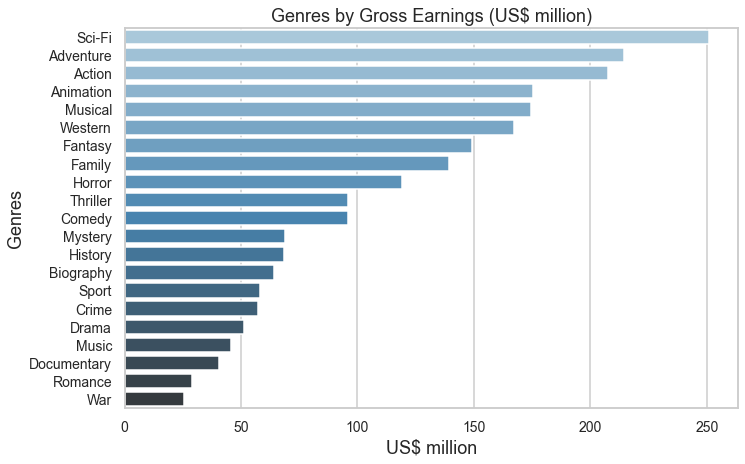

In [95]:
# Plot the average gross earnings per genre
plt.figure(figsize=(11, 7))
sns.set_style('whitegrid')
sns.set_context("talk")
ax = sns.barplot(x = "gross_mil", y = "genres", data = topratings_gross,
                 order = topratings_gross.sort_values('gross_mil', ascending = False).genres,
                 palette = 'Blues_d');
ax.set(xlabel = 'US$ million',
       ylabel = 'Genres', title = 'Genres by Gross Earnings (US$ million)')
plt.tick_params(labelsize = 14)
plt.show()

### Genres' Gross Earnings by Year

In [132]:
# Create a dataframe with release year, genre, and gross earnings from the most successful seven genres,
# only from 2013-2018
topratings_year = moviedf_small[['start_year', 'genres', 'gross_mil']]
topratings_year = topratings_year[(topratings_year['gross_mil'] > 139.7) &
                                 (topratings_year['genres'].isin(['Adventure',
                                                                  'Action',
                                                                  'Comedy',
                                                                  'Sci-Fi',
                                                                  'Drama',
                                                                  'Animation',
                                                                  'Musical'])) &
                                 (topratings_year['start_year'] > 2012)]

topratings_year.rename(columns = {'start_year': 'Year'}, inplace = True)
topratings_year

,Year,genres,gross_mil
38,2017,Action,412.6
38,2017,Adventure,412.6
42,2016,Drama,412.6
70,2015,Action,180.2
70,2015,Adventure,180.2
...,...,...,...
3152,2018,Adventure,201.1
3152,2018,Animation,201.1
3152,2018,Comedy,201.1
3198,2018,Drama,188.0


<Figure size 720x432 with 0 Axes>

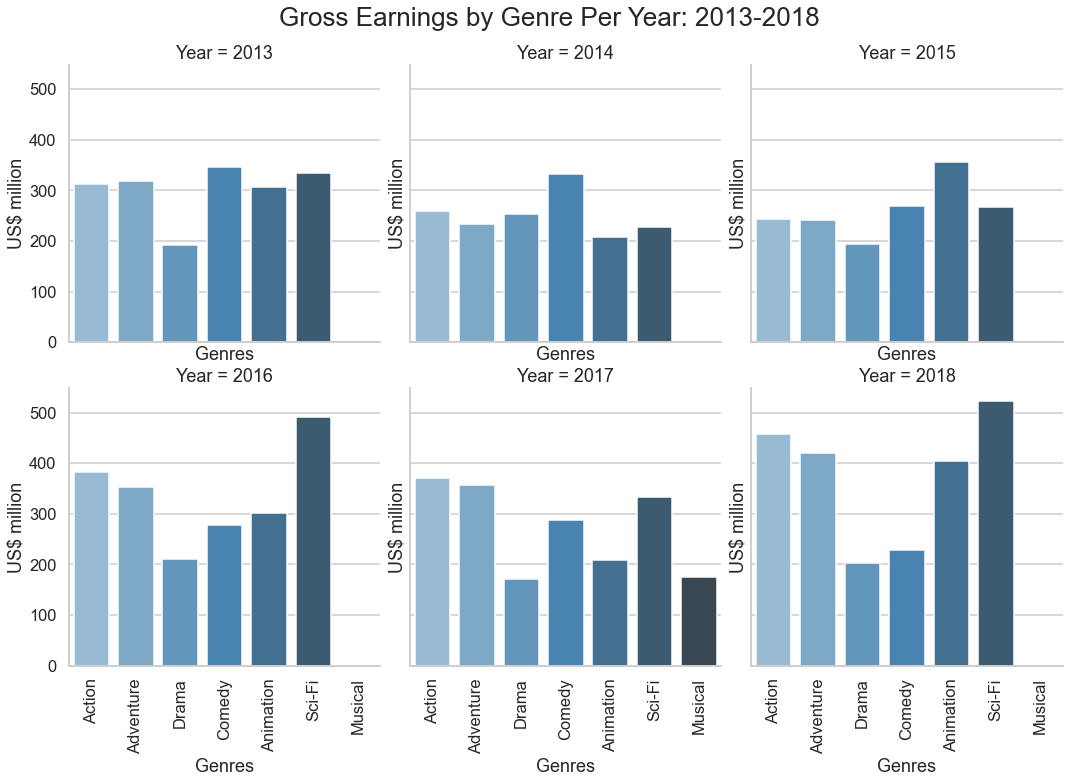

In [147]:
# Plot gross earnings by genre per year, faceting by year
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
ax = sns.catplot(x = "genres", y = "gross_mil",
                col = "Year",
                data = topratings_year,
                palette = 'Blues_d',
                kind = "bar",
                ci = None,
                col_wrap = 3);
ax.set(xlabel = 'Genres',
       ylabel = 'US$ million')
for axes in ax.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation = 90)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Gross Earnings by Genre Per Year: 2013-2018', fontsize = 26)
plt.show()

### Correlation Between Average Rating and Gross Earnings

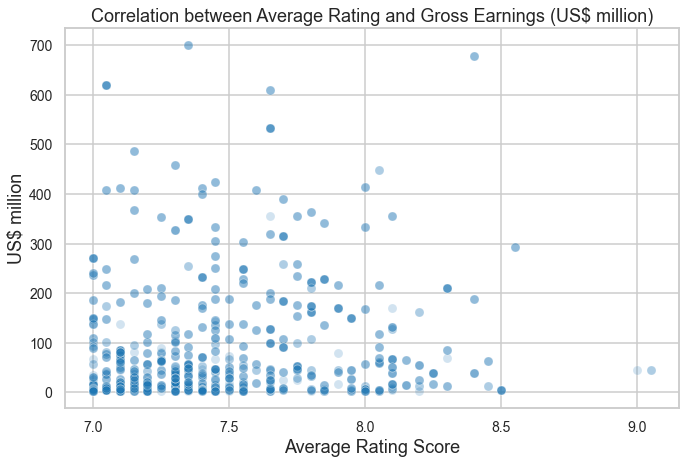

In [144]:
# Scatterplot of average rating and gross earnings to visualize correlation
plt.figure(figsize=(11, 7))
sns.set_style('whitegrid')
sns.set_context("talk")
ax = sns.scatterplot(x = "ratingave",
                y = "gross_mil",
                palette = 'Blues_d',
                alpha = 0.2,
                data = moviedf_small);
ax.set(xlabel = 'Average Rating Score',
       ylabel = 'US$ million',
       title = 'Correlation between Average Rating and Gross Earnings (US$ million)')
plt.tick_params(labelsize = 14)
plt.show()

In [145]:
# Find the correlation coefficient
moviedf_small.corr()

,start_year,gross_mil,ratingave
start_year,1.000000,0.094231,0.130957
gross_mil,0.094231,1.000000,0.089643
ratingave,0.130957,0.089643,1.000000


There is a very weak, positive correlation between rating average and gross earnings, with a correlation coefficient of 0.0896

***
## Evaluation


The stated business problem presented by Microsoft is establishing their own movie studio to compete within the digital content market, and needing to know what kind of movies will be the most successful.

This analysis solves the stated business problem by determining what kind of movies have been the most successful - in audience rating and gross earnings - between 2010-2018. In utilizing three large datasets from industry-standard giants of IMDb, The Movie Database, and Box Office Mojo, the data is comprehensive and trustworthy.

For mainstream, blockbuster movies, the data and results presented here will generalize well for the purpose of informing the vision of Microsoft Tenné. Should Microsoft Tenné decide to focus on more niche markets, we would need additional data from other sources to better provide more insight.

***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

This analysis shows the following:

* The top three genres by number of movies created: Drama (250), Comedy (102), Adventure (90)
* The top three genres by average rating: Musical (7.7), Sci-Fi (7.6), Animation (7.5)
* The top three genres by average gross earnings (in millions): Sci-Fi (251), Adventure (214), Action (207)

Listed in two of three categories are both Adventure and Sci-Fi, thus we can conclude based on cumulative number of movies produced, ratings, and earnings, Microsoft Tenné should feel confident investing in Adventure and Sci-Fi movies. If Microsoft Tenné wants to ensure success based on earnings, I reccomend

While there is a positive, albeit weak, correlation between rating and earnings, I advise Microsoft Tenné to concentrate their efforts on Adventure and Sci-Fi, given their consistent success. in rating and profit

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***